In [64]:
import json
from yt_dlp import YoutubeDL
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from os import path


# Retrieve the video links from json file
def getVideoLinks() -> list[str]:
    file_path = path.join(path.dirname(os.getcwd()), 'data/videos.json')
    with open(file_path) as f:
        data = json.load(f)
        return [video['link'] for video in data]
    

# Retrieve the downloaded file names
def getFileNames() -> list[str]:
    return os.listdir(path.join(path.dirname(os.getcwd()), 'data/dl_audios'))

In [ ]:
# Run when audios aren't downloaded - get the video links and download audios locally to data/dl_audios

URLs = getVideoLinks()

file_path = path.join(path.dirname(os.getcwd()), 'data/dl_audios')
ydl_config = {
    'format': 'm4a/bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'm4a',
    }],
    'outtmpl': path.join(file_path, '%(title)s.%(ext)s'),
}

with YoutubeDL(ydl_config) as ydl:
    error_code = ydl.download(URLs)

In [88]:
# Get the log mels of the files

def getLogMels(file_names: list[str]) -> np.ndarray:
    log_mels = np.ndarray(len(file_names), dtype=np.ndarray)

    for i, fn in enumerate(file_names):
        fp = path.join(path.join(path.dirname(os.getcwd()), 'data/dl_audios'), fn)
        y, sr = librosa.load(fp, sr=44100)
        mel = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        log_mels[i] = librosa.power_to_db(mel, ref=np.max)

    return log_mels

file_names = getFileNames()
log_mels = getLogMels(file_names)

/var/folders/bf/ndmghq_10v1_jwytcddbsk7c0000gn/T/ipykernel_36904/4288179314.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(fp, sr=44100)


/var/folders/bf/ndmghq_10v1_jwytcddbsk7c0000gn/T/ipykernel_36904/459010627.py:8: UserWarning: Glyph 65372 (\N{FULLWIDTH VERTICAL LINE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


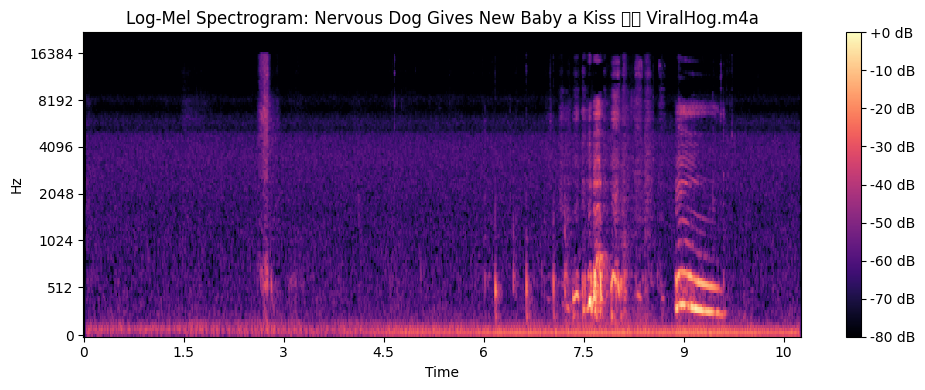

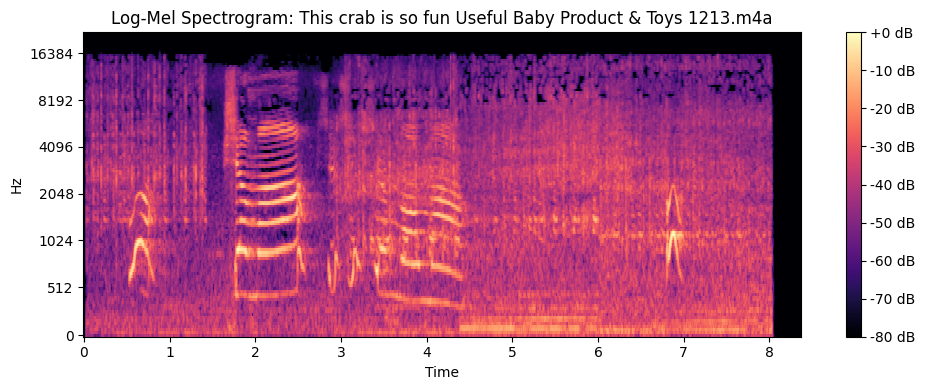

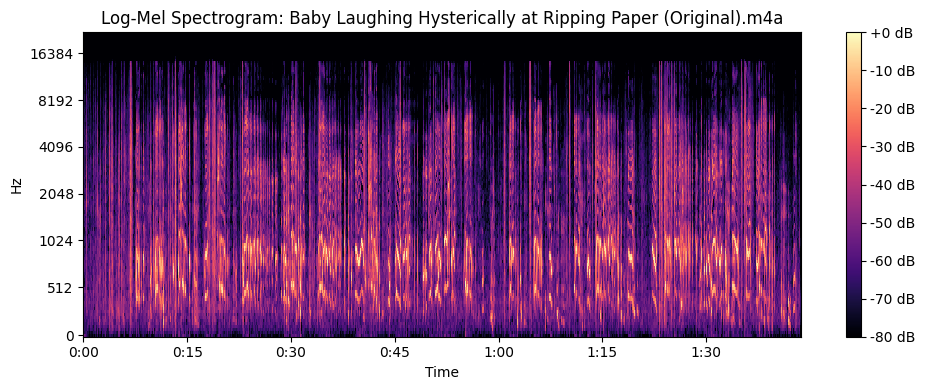

In [93]:
# Visualize first 3 log mel spectograms

for i in range(3):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mels[i], sr=44100, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Log-Mel Spectrogram: {file_names[i]}')
    plt.tight_layout()
    plt.show()
